### LSE Data Analytics Online Career Accelerator 

# DA301:  Advanced Analytics for Organisational Impact

## Vision Zero road safety survey analysis

This notebook looks at responses to a survey about road safety. The ultimate objective of the data anaysis is to improve driver, pedestrian, and bicyclist transportation safety. What can we extract from the comments left by the respondents that can help us better understand the current sentiment towards road safety? Could we perhaps find any strong indication where improvements need to be made?

In [1]:
# Import necessary libraries.
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

# Import the data set.
survey_data = pd.read_csv('../Data/Vision_Zero_Safety.csv')

# View the data.
survey_data.shape

(5591, 11)

# 1. Pre-process the data

### Drop rows from the table that do not have any value for their COMMENTS field

In [2]:
# Determine the number of rows where the comments are not populated
survey_data['COMMENTS'].isna().sum()

651

In [3]:
# Drop the empty rows.
survey_data.dropna(subset=['COMMENTS'], inplace=True)

# View the shape of the DataFrame.
survey_data.shape

(4940, 11)

### Change all the words in the comments to lower case

In [4]:
# Transform data to lowercase.
survey_data['COMMENTS'] = survey_data['COMMENTS'].apply(lambda x: " ".join(x.lower() for x in x.split()))

# Preview the result.
survey_data['COMMENTS'].head()

0    cars for valet at the capital grille constantl...
1                                 illegal u-turns here
2    there is no walk sign on this intersection so ...
3    constant issue; mpd never enforces despite rep...
4               some cyclists often run this red light
Name: COMMENTS, dtype: object

### Remove punctuation

In [5]:
# Remove punctuation.
survey_data['COMMENTS'] = survey_data['COMMENTS'].str.replace('[^\w\s]','')

# Preview the result.
survey_data['COMMENTS'].head()

0    cars for valet at the capital grille constantl...
1                                  illegal uturns here
2    there is no walk sign on this intersection so ...
3    constant issue mpd never enforces despite repe...
4               some cyclists often run this red light
Name: COMMENTS, dtype: object

### Drop duplicates from the COMMENTS column

In [6]:
# Check the number of duplicate values in the COMMENTS column.
survey_data.COMMENTS.duplicated().sum()

282

In [7]:
# Drop duplicates.
survey = survey_data.drop_duplicates(subset=['COMMENTS'])

# Preview data.
survey.reset_index(inplace=True)
survey.head()

,index,X,Y,OBJECTID,GLOBALID,REQUESTID,USERTYPE,REQUESTTYPE,REQUESTDATE,STATUS,STREETSEGID,COMMENTS
0,0,-77.020315,38.892890,1,{7AA2347A-C035-4D5A-9196-07C309B4C7BF},1,Pedestrian,Blocking the crosswalk,2015/06/29 19:56:00+00,Unassigned,10022.0,cars for valet at the capital grille constantl...
1,1,-77.020877,38.893046,2,{1AFF4069-5D94-49A1-9D1F-0A089D414F5F},2,Pedestrian,Other Driving Issue,2015/06/29 19:57:36+00,Unassigned,10022.0,illegal uturns here
2,2,-77.024643,38.918125,3,{908CCF07-A389-40EE-B5D2-7ADAF90404D1},3,Pedestrian,Not enough time to cross,2015/06/29 20:14:32+00,Unassigned,10396.0,there is no walk sign on this intersection so ...
3,3,-77.003515,38.896124,4,{12E7A594-76F9-41CE-91AC-9B6B8E08EC5C},4,Pedestrian,Stop sign running,2015/06/29 20:15:02+00,Unassigned,4381.0,constant issue mpd never enforces despite repe...
4,4,-77.017562,38.883266,5,{0AED48A8-A4DD-44E9-8C4A-D45E14E7462D},5,Biker,Cyclist behavior,2015/06/29 20:15:05+00,Unassigned,5344.0,some cyclists often run this red light


In [8]:
# View the shape of the data.
survey.shape

(4658, 12)

> The rows with empty fields and the duplicate entries in the `COMMENTS` column have been removed from the DataFrame.

# 2. Visualise the most frequently used words

In [10]:
# String all the comments together in a single variable.
# Create an empty string variable.
all_comments = ''
for i in range(survey.shape[0]):
    # Add each comment.
    all_comments = all_comments + survey['COMMENTS'][i]

In [11]:
# You might need to install WordCloud.
!pip install WordCloud

In [13]:
# Import along with matplotlib and seaborn for visualisation.
from wordcloud import WordCloud 
import matplotlib.pyplot as plt 
import seaborn as sns

> If you get an error message, re-install WorldCloud. 

In [14]:
# Set the colour palette.
sns.set(color_codes=True)

# Create a WordCloud object.
word_cloud = WordCloud(width = 1600, height = 900, 
                background_color ='white',
                colormap = 'plasma', 
                stopwords = 'none',
                min_font_size = 10).generate(all_comments) 

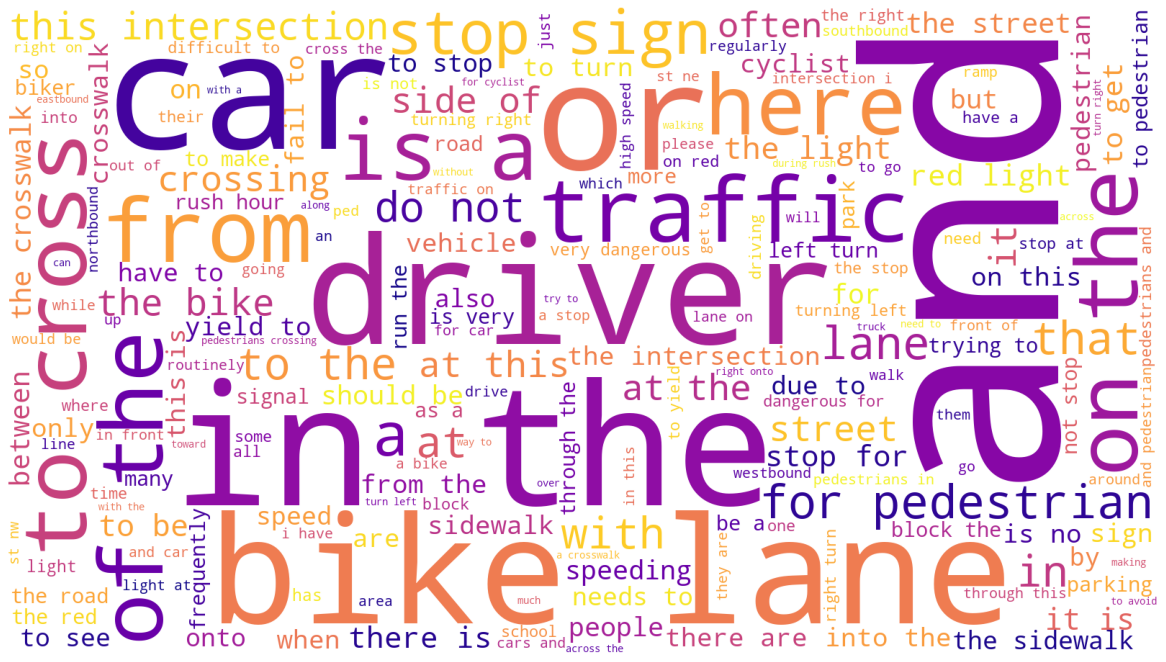

In [15]:
# Plot the WordCloud image.                    
plt.figure(figsize = (16, 9), facecolor = None) 
plt.imshow(word_cloud) 
plt.axis('off') 
plt.tight_layout(pad = 0) 
plt.show()

# Note that your word cloud might differ slightly from the one provided.

# 3. Find the most frequently used words with tokenisation

In [16]:
# You should have installed the nltk library previously.
# Otherwise:
# !pip install nltk

In [17]:
# Import nltk and download nltk's resources to assist with tokenisation.
import nltk

nltk.download('punkt')
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ashle\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


### Tokenisation

In [18]:
# Tokenise the words.
survey['tokens'] = survey['COMMENTS'].apply(word_tokenize)

# Preview data.
survey['tokens'].head()

0    [cars, for, valet, at, the, capital, grille, c...
1                              [illegal, uturns, here]
2    [there, is, no, walk, sign, on, this, intersec...
3    [constant, issue, mpd, never, enforces, despit...
4       [some, cyclists, often, run, this, red, light]
Name: tokens, dtype: object

In [19]:
# Define an empty list of tokens.
all_tokens = []

for i in range(survey.shape[0]):
    # Add each token to the list.
    all_tokens = all_tokens + survey['tokens'][i]

In [20]:
# Import the FreqDist class.
from nltk.probability import FreqDist

# Calculate the frequency distribution.
fdist = FreqDist(all_tokens)

# Preview data.
fdist

FreqDist({'the': 5567, 'to': 4358, 'and': 3122, 'a': 2298, 'on': 2161, 'is': 1999, 'of': 1908, 'cars': 1856, 'this': 1698, 'for': 1517, ...})

In [21]:
# Filter out tokens that are neither alphabets nor numbers (to eliminate punctuation marks, etc.).
tokens = [word for word in all_tokens if word.isalnum()]

### Eliminate stopwords

In [22]:
# Download the stopword list.
nltk.download ('stopwords')
from nltk.corpus import stopwords

# Create a set of English stopwords.
english_stopwords = set(stopwords.words('english'))

# Create a filtered list of tokens without stopwords.
tokens2 = [x for x in tokens if x.lower() not in english_stopwords]

# Define an empty string variable.
tokens2_string = ''

for value in tokens:
    # Add each filtered token word to the string.
    tokens2_string = tokens2_string + value + ' '

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ashle\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


### Visualise the tokens of relevance in a word cloud

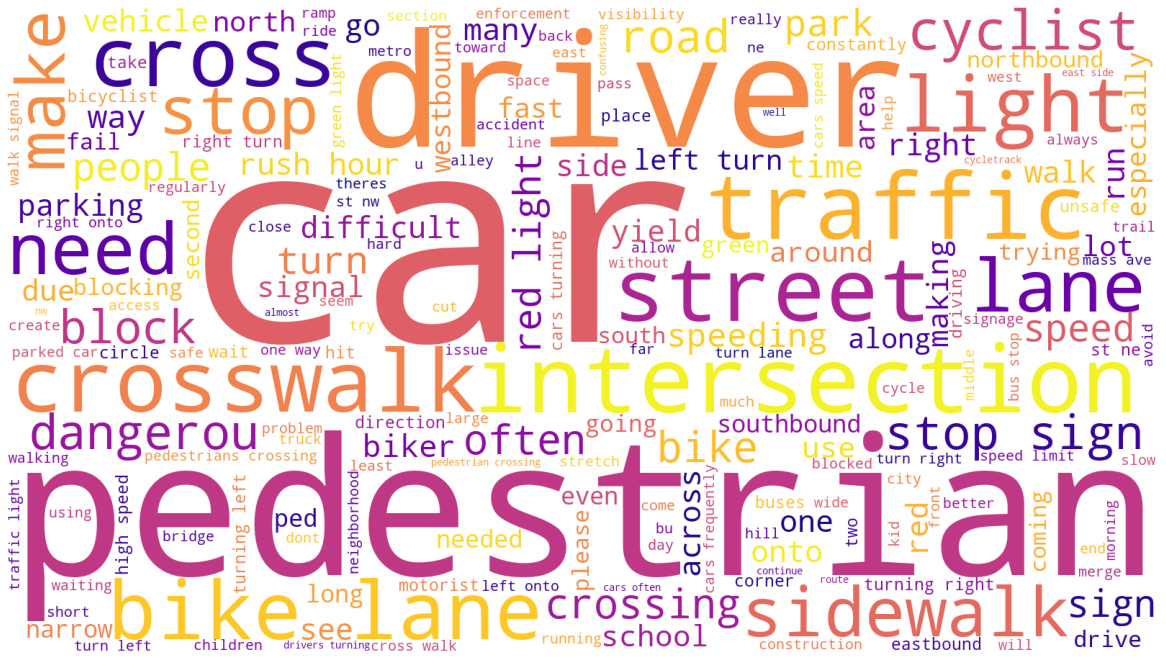

In [23]:
# Create a WordCloud.
wordcloud = WordCloud(width = 1600, height = 900, 
                background_color ='white', 
                colormap='plasma', 
                min_font_size = 10).generate(tokens2_string) 

# Plot the WordCloud image.                        
plt.figure(figsize = (16, 9), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis('off') 
plt.tight_layout(pad = 0) 
plt.show()

# Note that your word cloud might differ slightly to the one provided.

## 4. Count the top 15 words that appear most often

In [24]:
# View the frequency distribution.
fdist1 = FreqDist(tokens2)

# Preview the data.
fdist1

FreqDist({'cars': 1856, 'pedestrians': 1143, 'street': 1056, 'drivers': 1009, 'lane': 992, 'stop': 983, 'traffic': 976, 'bike': 817, 'intersection': 810, 'light': 797, ...})

In [31]:
# Import the Counter class.
from collections import Counter

# Generate a DataFrame from Counter.
counts = pd.DataFrame(Counter(tokens2).most_common(15),
                      columns=['Word', 'Frequency']).set_index('Word')

# Preview data.
counts

,Frequency
Word,
cars,1856
pedestrians,1143
street,1056
drivers,1009
lane,992
stop,983
traffic,976
bike,817
intersection,810


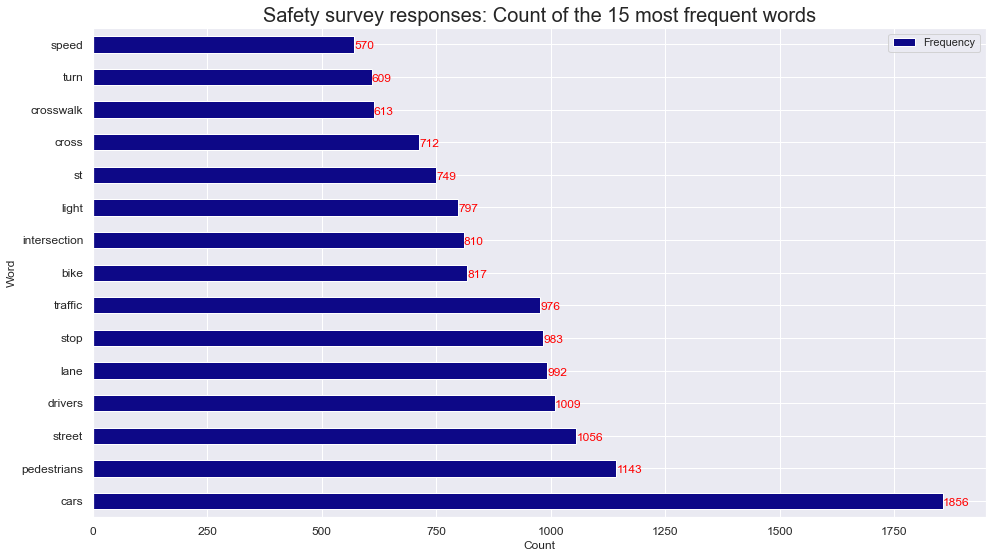

In [32]:
# Set the plot type.
ax = counts.plot(kind='barh', figsize=(16, 9), fontsize=12,
                 colormap ='plasma')

# Set the labels.
ax.set_xlabel('Count', fontsize=12)
ax.set_ylabel('Word', fontsize=12)
ax.set_title("Safety survey responses: Count of the 15 most frequent words",
             fontsize=20)

# Draw the bar labels.
for i in ax.patches:
    ax.text(i.get_width()+.41, i.get_y()+.1, str(round((i.get_width()), 2)),
            fontsize=12, color='red')

# 

### 5. Extract polarity and subjectivity from survey comments

### 6. Visualise sentiment polarity scores on a histogram

### 7. Extract contextualised comments

### 8. Identify named entities

### 9. Visualise named entities

In [ ]:
# Install spaCy for Windows and macOS.
!pip install -U pip setuptools wheel
!pip install -U spacy
!python -m spacy download en_core_web_sm

### 10. Generate a document-term matrix

## Conclusion(s)

> Write your own conclusions here.